# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

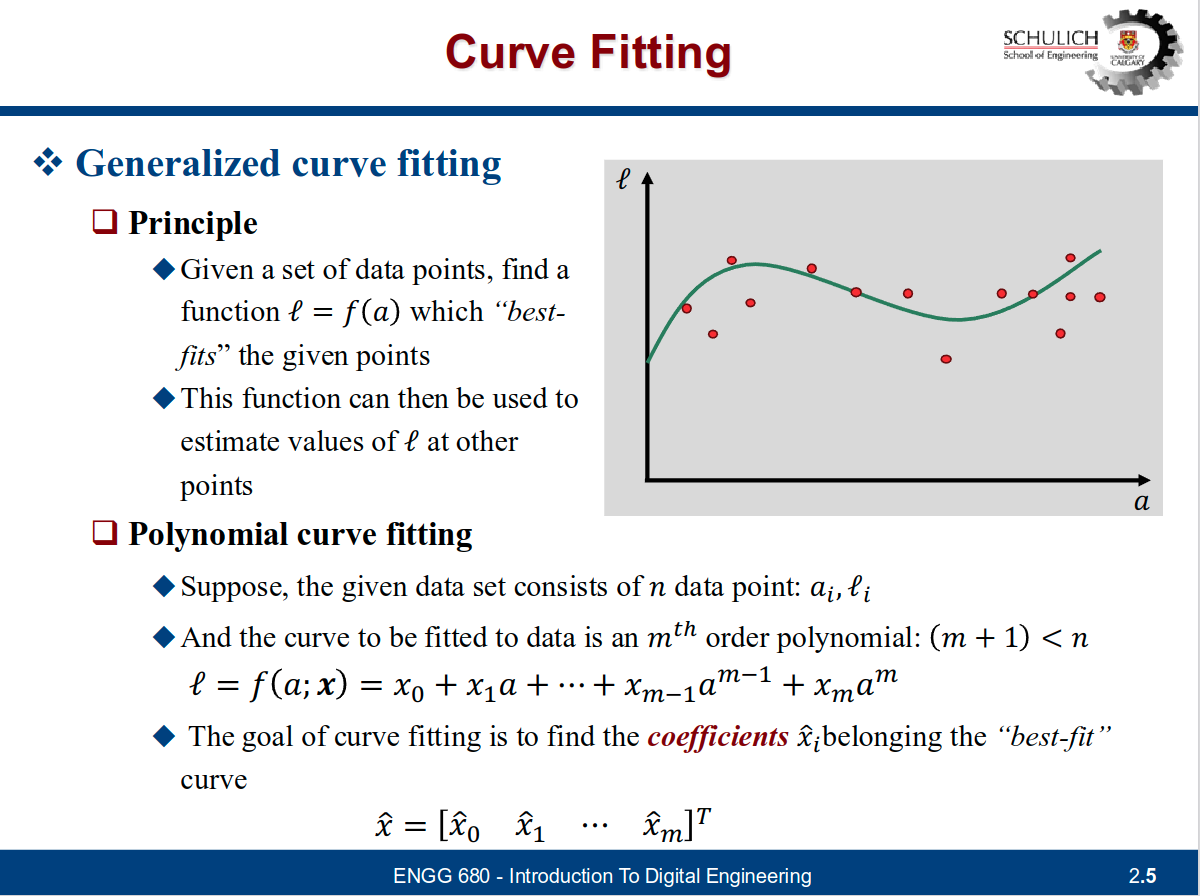

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('data.xlsx')  
arr_data = np.array(df_data)

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]

In [3]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


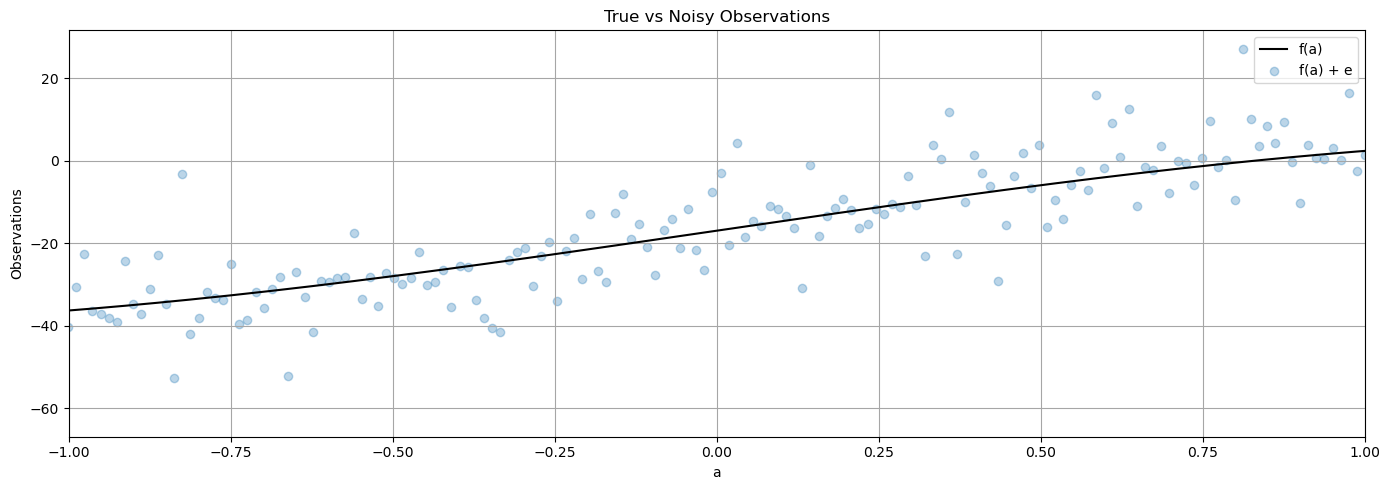

In [4]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))


# Plot true observations
ax.plot(a, l_true, label='f(a)', color='k')

# Scatter plot for noisy observations
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)

# Axis labels, legend, and title
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('True vs Noisy Observations')
ax.legend()

# Scale the range of x-axis to be -1 to 1
ax.set_xlim(-1, 1)

# Add grid
ax.grid(True, which='both', ls='-', color='0.65')

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [5]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

  # Step 1: Construct the design matrix A (Vandermonde matrix)
    A = np.vander(a, deg+1, increasing=True)  # Construct Vandermonde matrix for polynomial fitting

    # Step 2: Apply the weighted least squares estimation formula
    # Normal equation: x = (A^T P A)^{-1} A^T P l
    AT = A.T                           # Transpose of the design matrix A
    AT_P = np.dot(AT, P)               # A^T * P
    N = np.dot(AT_P, A)                # N = A^T * P * A (normal matrix)
    x = np.linalg.inv(N) @ AT_P @ l    # Estimated coefficients using the normal equation

    # Step 3: Calculate the observation residuals
    v = l - A @ x  # Residuals (difference between observed and fitted values)

    # Step 4: Calculate the covariance matrix of the estimated coefficients
    cov_x = np.linalg.inv(N)  # Covariance of the coefficients

    # Step 5: Compute the a posteriori variance factor (apv)
    # apv = (v^T P v) / (n - m), where n is the number of observations and m is the number of parameters
    n = len(l)                   # Number of observations
    m = deg + 1                  # Number of parameters (degree of polynomial + 1)
    apv = (v.T @ P @ v) / (n - m)  # a posteriori variance factor
    
    return (x, cov_x, apv, v)

In [6]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# ...

# Store results for different polynomial degrees
x_line, cov_x_line, apv_line, v_line = fit_polynomial_curve(a, l, P, deg=1)   # Degree 1
x_cubic, cov_x_cubic, apv_cubic, v_cubic = fit_polynomial_curve(a, l, P, deg=3) # Degree 3
x_quintic, cov_x_quintic, apv_quintic, v_quintic = fit_polynomial_curve(a, l, P, deg=5) # Degree 5

# Print the results to verify
print("Degree 1 Polynomial Fit Results:")
print(f"Estimated Coefficients: {x_line}")
print(f"Covariance Matrix: \n{cov_x_line}")
print(f"A Posteriori Variance Factor (APV): {apv_line}")
print(f"Residuals: {v_line}")
print("----------------------------------------------------\n")

print("Degree 3 Polynomial Fit Results:")
print(f"Estimated Coefficients: {x_cubic}")
print(f"Covariance Matrix: \n{cov_x_cubic}")
print(f"A Posteriori Variance Factor (APV): {apv_cubic}")
print(f"Residuals: {v_cubic}")
print("----------------------------------------------------\n")

print("Degree 5 Polynomial Fit Results:")
print(f"Estimated Coefficients: {x_quintic}")
print(f"Covariance Matrix: \n{cov_x_quintic}")
print(f"A Posteriori Variance Factor (APV): {apv_quintic}")
print(f"Residuals: {v_quintic}")

Degree 1 Polynomial Fit Results:
Estimated Coefficients: [-16.59352348   7.25633807]
Covariance Matrix: 
[[2.00000000e-03 6.88374083e-20]
 [6.88374083e-20 6.05500247e-04]]
A Posteriori Variance Factor (APV): 162.742608604322
Residuals: [ 2.31950929e+01  2.33624696e+01  5.16650752e-01  2.33475847e+01
  1.96698387e+01  2.37681600e+01  2.33453696e+01  2.18331528e+01
  2.11355408e+01  5.61358715e+00  2.24756392e+01  1.33407067e+01
  2.34014210e+01  2.24034178e+01  1.13532794e+01  2.53650032e+01
  1.44202357e+01  8.52085442e+00  1.79247562e+01  2.11851700e+00
  1.46072683e+01  9.70673172e+00  1.30817824e+01  1.63166651e+01
  1.15688083e+01  1.16383392e+01  6.07754648e+00  3.24693889e+01
  1.42879391e+01  1.41679638e+01  1.73166729e+01  7.83535648e+00
  1.73215977e+01  1.35522578e+01 -5.87401633e+00 -2.04342770e+00
  8.45600371e+00 -7.17469845e+00  7.13670400e+00  4.93927812e+00
  7.53688443e+00  1.29373203e+01  6.55314295e+00  5.69877998e+00
  1.01514943e+01  4.53954123e+00  1.48752086e+01 

In [7]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

# For degree 1 (linear)
line_uw = np.polyval(np.flip(x_line), a)  # np.polyval requires coefficients in descending order of powers

# For degree 3 (cubic)
cubic_uw = np.polyval(np.flip(x_cubic), a)

# For degree 5 (quintic)
quintic_uw = np.polyval(np.flip(x_quintic), a)

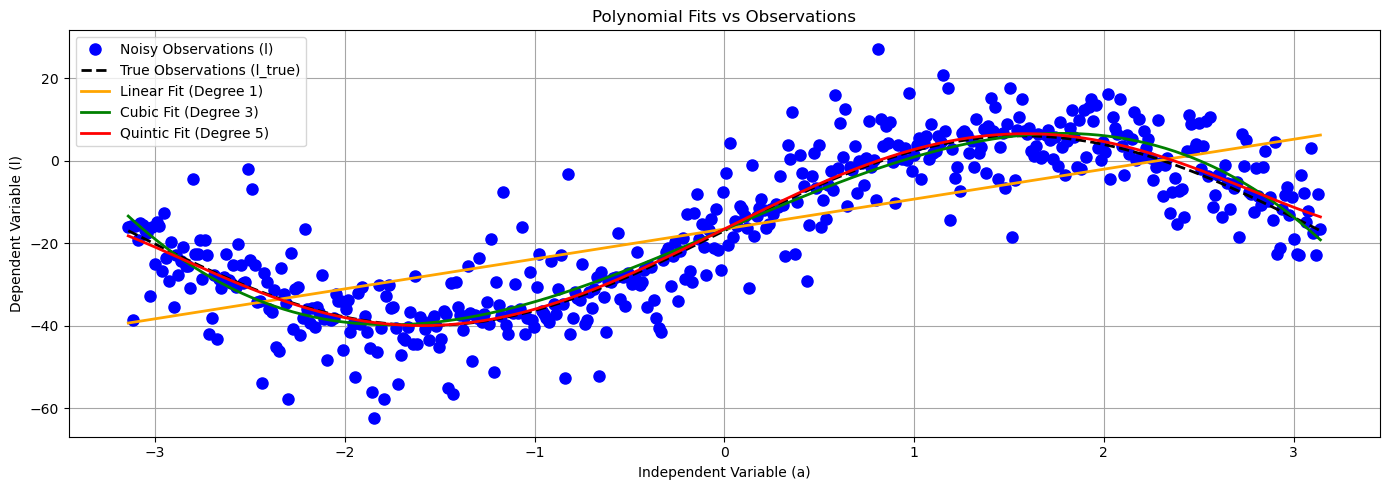

In [8]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# ...
# Plot the noisy observations
ax.plot(a, l, 'bo', label='Noisy Observations (l)', markersize=8)

# Plot the true observations
ax.plot(a, l_true, 'k--', label='True Observations (l_true)', linewidth=2)

# Plot polynomial fits
ax.plot(a, line_uw, color='orange', label='Linear Fit (Degree 1)', linewidth=2)
ax.plot(a, cubic_uw, color='green', label='Cubic Fit (Degree 3)', linewidth=2)
ax.plot(a, quintic_uw, color='red', label='Quintic Fit (Degree 5)', linewidth=2)

# Add labels and title
ax.set_xlabel('Independent Variable (a)')
ax.set_ylabel('Dependent Variable (l)')
ax.set_title('Polynomial Fits vs Observations')

# Add legend
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [9]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# ...
print("A Posteriori Variance Factor (APV) for Degree 1 Polynomial:", apv_line)
print("A Posteriori Variance Factor (APV) for Degree 3 Polynomial:", apv_cubic)
print("A Posteriori Variance Factor (APV) for Degree 5 Polynomial:", apv_quintic)

A Posteriori Variance Factor (APV) for Degree 1 Polynomial: 162.742608604322
A Posteriori Variance Factor (APV) for Degree 3 Polynomial: 66.13227783131883
A Posteriori Variance Factor (APV) for Degree 5 Polynomial: 63.758344630184176


In [10]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# ...
# Predicted observations from each polynomial fit (already computed in previous steps)
# line_uw, cubic_uw, quintic_uw are the predicted observations from the polynomial fits
# l_true is the array of true observations

# Compute L2 norm for each polynomial fit
norm_line = np.linalg.norm(line_uw - l_true)      # Norm for degree 1 (linear fit)
norm_cubic = np.linalg.norm(cubic_uw - l_true)    # Norm for degree 3 (cubic fit)
norm_quintic = np.linalg.norm(quintic_uw - l_true) # Norm for degree 5 (quintic fit)

# Print the norms
print("Norm between Linear Fit (Degree 1) and True Observations:", norm_line)
print("Norm between Cubic Fit (Degree 3) and True Observations:", norm_cubic)
print("Norm between Quintic Fit (Degree 5) and True Observations:", norm_quintic)

Norm between Linear Fit (Degree 1) and True Observations: 229.06016796744092
Norm between Cubic Fit (Degree 3) and True Observations: 38.285979929116685
Norm between Quintic Fit (Degree 5) and True Observations: 17.36996719696605


In [15]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...
# Step 11: Comment on the results of a posteriori variance factor and norm

print("\nStep 11: Comment on the results")

print("1. A Posteriori Variance Factor (APV):")
print("   - The APV decreases as the polynomial degree increases, indicating a better fit with more complex models.")
print("   - The weighted APV is much lower than the unweighted APV for all degrees, meaning that the weighted LSE improves the model fit by accounting for observation variances.")

print("\n2. Norm between predicted and true observations:")
print("   - The norm decreases as the degree of the polynomial increases, showing that higher-degree polynomials better approximate the true observations.")
print("   - In the weighted case, the norm is consistently lower for the cubic and quintic models, indicating that the weighted LSE approach enhances model accuracy for more complex fits.")
print("   - For the linear model, the norm shows a slight increase in the weighted case, likely because the linear fit cannot fully capture the complexity of the data.")

print("\nPattern Observed:")
print("   - Overall, weighted LSE produces better fits, particularly for higher-degree polynomials, by giving more reliable observations (those with lower variance) greater influence.")





Step 11: Comment on the results
1. A Posteriori Variance Factor (APV):
   - The APV decreases as the polynomial degree increases, indicating a better fit with more complex models.
   - The weighted APV is much lower than the unweighted APV for all degrees, meaning that the weighted LSE improves the model fit by accounting for observation variances.

2. Norm between predicted and true observations:
   - The norm decreases as the degree of the polynomial increases, showing that higher-degree polynomials better approximate the true observations.
   - In the weighted case, the norm is consistently lower for the cubic and quintic models, indicating that the weighted LSE approach enhances model accuracy for more complex fits.
   - For the linear model, the norm shows a slight increase in the weighted case, likely because the linear fit cannot fully capture the complexity of the data.

Pattern Observed:
   - Overall, weighted LSE produces better fits, particularly for higher-degree polynomia

In [11]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

# Define the weight matrix P as the inverse of the variances
P_w = np.diag(1 / l_var)

# Print the P matrix to verify
print("P matrix (Weight matrix):\n", P_w)

P matrix (Weight matrix):
 [[0.02777778 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00694444 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00591716 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.04       0.         0.        ]
 [0.         0.         0.         ... 0.         0.015625   0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]


Degree 1 Polynomial Fit Results:
Estimated Coefficients: [-16.54496159   7.67854617]
Covariance Matrix: 
[[1.98409637e-02 7.79133583e-05]
 [7.79133583e-05 6.61173575e-03]]
A Posteriori Variance Factor (APV): 12.054651233436909
Residuals: [ 2.44729369e+01  2.46349973e+01  1.78386220e+00  2.46094799e+01
  2.09264177e+01  2.50194227e+01  2.45913160e+01  2.30737830e+01
  2.23708547e+01  6.84358480e+00  2.37003206e+01  1.45600719e+01
  2.46154698e+01  2.36121505e+01  1.25566958e+01  2.65631033e+01
  1.56130195e+01  9.70832203e+00  1.91069076e+01  3.29535209e+00
  1.57787872e+01  1.08729343e+01  1.42426688e+01  1.74722352e+01
  1.27190621e+01  1.27832767e+01  7.21716778e+00  3.36036939e+01
  1.54169279e+01  1.52916364e+01  1.84350292e+01  8.94839650e+00
  1.84293215e+01  1.46546653e+01 -4.77692507e+00 -9.51652696e-01
  9.54246246e+00 -6.09355597e+00  8.21253024e+00  6.00978810e+00
  8.60207815e+00  1.39971978e+01  7.60770415e+00  6.74802493e+00
  1.11954230e+01  5.57815367e+00  1.59085048e+0

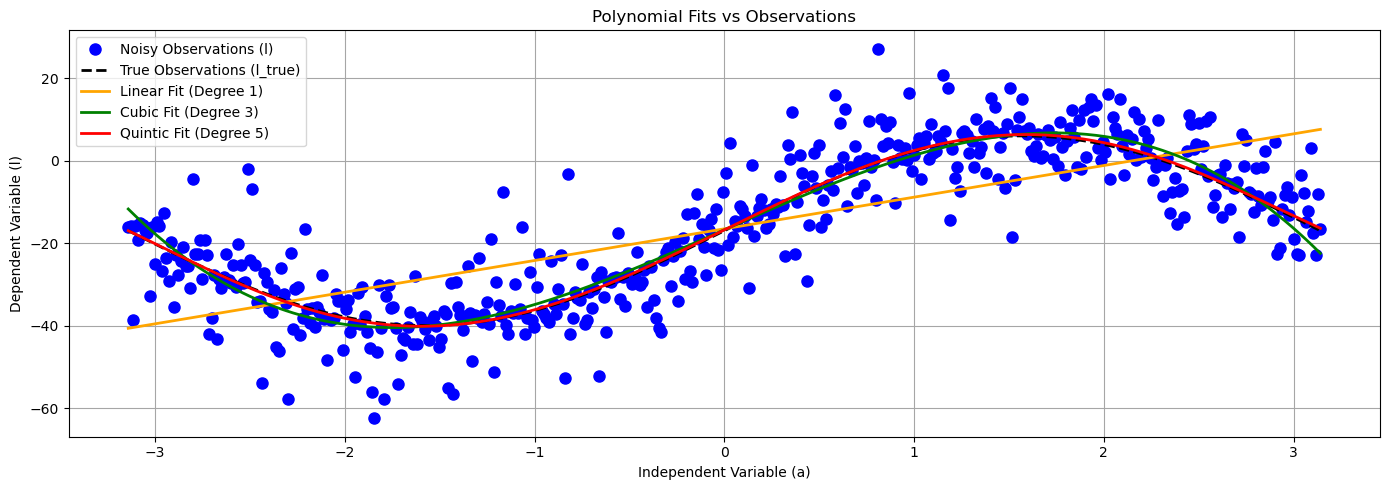

In [12]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...
# Store results for different polynomial degrees
x_line_w, cov_x_line_w, apv_line_w, v_line_w = fit_polynomial_curve(a, l, P_w, deg=1)   # Degree 1
x_cubic_w, cov_x_cubic_w, apv_cubic_w, v_cubic_w = fit_polynomial_curve(a, l, P_w, deg=3) # Degree 3
x_quintic_w, cov_x_quintic_w, apv_quintic_w, v_quintic_w = fit_polynomial_curve(a, l, P_w, deg=5) # Degree 5

# Print the results to verify
print("Degree 1 Polynomial Fit Results:")
print(f"Estimated Coefficients: {x_line_w}")
print(f"Covariance Matrix: \n{cov_x_line_w}")
print(f"A Posteriori Variance Factor (APV): {apv_line_w}")
print(f"Residuals: {v_line_w}")
print("----------------------------------------------------\n")

print("Degree 3 Polynomial Fit Results:")
print(f"Estimated Coefficients: {x_cubic_w}")
print(f"Covariance Matrix: \n{cov_x_cubic_w}")
print(f"A Posteriori Variance Factor (APV): {apv_cubic_w}")
print(f"Residuals: {v_cubic_w}")
print("----------------------------------------------------\n")

print("Degree 5 Polynomial Fit Results:")
print(f"Estimated Coefficients: {x_quintic_w}")
print(f"Covariance Matrix: \n{cov_x_quintic_w}")
print(f"A Posteriori Variance Factor (APV): {apv_quintic_w}")
print(f"Residuals: {v_quintic_w}")

# For degree 1 (linear)
line_w = np.polyval(np.flip(x_line_w), a)  # np.polyval requires coefficients in descending order of powers

# For degree 3 (cubic)
cubic_w = np.polyval(np.flip(x_cubic_w), a)

# For degree 5 (quintic)
quintic_w = np.polyval(np.flip(x_quintic_w), a)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# ...
# Plot the noisy observations
ax.plot(a, l, 'bo', label='Noisy Observations (l)', markersize=8)

# Plot the true observations
ax.plot(a, l_true, 'k--', label='True Observations (l_true)', linewidth=2)

# Plot polynomial fits
ax.plot(a, line_w, color='orange', label='Linear Fit (Degree 1)', linewidth=2)
ax.plot(a, cubic_w, color='green', label='Cubic Fit (Degree 3)', linewidth=2)
ax.plot(a, quintic_w, color='red', label='Quintic Fit (Degree 5)', linewidth=2)

# Add labels and title
ax.set_xlabel('Independent Variable (a)')
ax.set_ylabel('Dependent Variable (l)')
ax.set_title('Polynomial Fits vs Observations')

# Add legend
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

print("A Posteriori Variance Factor (APV) for Degree 1 Polynomial:", apv_line_w)
print("A Posteriori Variance Factor (APV) for Degree 3 Polynomial:", apv_cubic_w)
print("A Posteriori Variance Factor (APV) for Degree 5 Polynomial:", apv_quintic_w)

# Compute L2 norm for each polynomial fit
norm_line_w = np.linalg.norm(line_w - l_true)      # Norm for degree 1 (linear fit)
norm_cubic_w = np.linalg.norm(cubic_w - l_true)    # Norm for degree 3 (cubic fit)
norm_quintic_w = np.linalg.norm(quintic_w - l_true) # Norm for degree 5 (quintic fit)

# Print the norms
print("Norm between Linear Fit (Degree 1) and True Observations:", norm_line_w)
print("Norm between Cubic Fit (Degree 3) and True Observations:", norm_cubic_w)
print("Norm between Quintic Fit (Degree 5) and True Observations:", norm_quintic_w)

In [17]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...

print("\nA Posteriori Variance Factor (APV) for Degree 1 Polynomial unweighted:", apv_line)
print("A Posteriori Variance Factor (APV) for Degree 1 Polynomial weighted:", apv_line_w)

print("\nA Posteriori Variance Factor (APV) for Degree 3 Polynomial unweighted:", apv_cubic)
print("A Posteriori Variance Factor (APV) for Degree 3 Polynomial weighted:", apv_cubic_w)

print("\nA Posteriori Variance Factor (APV) for Degree 5 Polynomial unweighted:", apv_quintic)
print("A Posteriori Variance Factor (APV) for Degree 5 Polynomial weighted:", apv_quintic_w)

print("\nNorm between Linear Fit (Degree 1) and True Observations unweighted:", norm_line)
print("Norm between Linear Fit (Degree 1) and True Observations weighted:", norm_line_w)

print("\nNorm between Cubic Fit (Degree 3) and True Observations unweighted:", norm_cubic)
print("Norm between Cubic Fit (Degree 3) and True Observations weighted:", norm_cubic_w)

print("\nNorm between Quintic Fit (Degree 5) and True Observations unweighted:", norm_quintic)
print("Norm between Quintic Fit (Degree 5) and True Observations weighted:", norm_quintic_w)

# Compare and explain phenomena based on APV and Norm results
print("\nKey Observations:")

print("1. The A Posteriori Variance Factor (APV) decreases significantly for all polynomial degrees when using weighted LSE. This indicates that the weighted approach better accounts for the variance in the observations, leading to a more accurate model fit.")
print("2. For higher-degree polynomials (cubic and quintic), the norm between the predicted and true observations decreases more in the weighted case, suggesting that these models benefit more from the weighted approach.")
print("3. While the norm for the linear fit increases slightly when weights are applied, this may be due to the model's simplicity, as it struggles to capture the complexity of the data even with weighting.")
print("4. Overall, weighted LSE improves the accuracy of the models, especially for higher-degree polynomials, by focusing more on reliable observations (lower variance).")



A Posteriori Variance Factor (APV) for Degree 1 Polynomial unweighted: 162.742608604322
A Posteriori Variance Factor (APV) for Degree 1 Polynomial weighted: 12.054651233436909

A Posteriori Variance Factor (APV) for Degree 3 Polynomial unweighted: 66.13227783131883
A Posteriori Variance Factor (APV) for Degree 3 Polynomial weighted: 1.144464702653713

A Posteriori Variance Factor (APV) for Degree 5 Polynomial unweighted: 63.758344630184176
A Posteriori Variance Factor (APV) for Degree 5 Polynomial weighted: 0.9447009043856548

Norm between Linear Fit (Degree 1) and True Observations unweighted: 229.06016796744092
Norm between Linear Fit (Degree 1) and True Observations weighted: 230.67760813832948

Norm between Cubic Fit (Degree 3) and True Observations unweighted: 38.285979929116685
Norm between Cubic Fit (Degree 3) and True Observations weighted: 36.07026687266811

Norm between Quintic Fit (Degree 5) and True Observations unweighted: 17.36996719696605
Norm between Quintic Fit (Degre

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

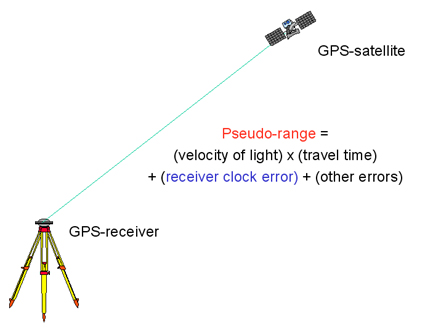

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = #...
df_sat_pos = #...

pseudorange = #...
sat_pos = #...

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = #...
m = #...

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = #...

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = #...

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = #...
i = #...
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  #...
  return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (#convergence criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = #...

       # compute the design matrix A
       # (1 marks)
       A = #...

       # compute the misclosure array w
       # (1 marks)
       w = #...

       # compute the corrections delta
       # (1 marks)
       delta = #...

       # update the states
       # (1 marks)
       x_hat = #...


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
